# Analyzing the trend in movie rating (Naver)

## Import Data

In [1]:
## C:/Users/Tae Hyung/Desktop/Data Project/Movie Rating change Analysis/Movie_Rating.csv

In [2]:
from bs4 import BeautifulSoup

In [3]:
import pandas as pd

In [4]:
from urllib.request import urlopen
url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190822"
url

'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190822'

### Use BeautifulSoup

In [6]:
page = urlopen( "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20190822").read()

# soup.prettify()
soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20190822" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [7]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=163788" title="알라딘">알라딘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=136900" title="어벤져스: 엔드게임">어벤져스: 엔드게임</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164907" title="레드슈즈">레드슈즈</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=18781" title="이웃집 토토로">이웃집 토토로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=187051" title="브링 더 소울 : 더 무비">브링 더 소울 : 더 무비</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=101966" title="토이 스토리 4">토이 스토리 4</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=177374" title="증인">증인</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=16208" title="퍼펙트 월드">퍼펙트 월드</a>
 </div>,

#### Finding only the titles of the movie

In [8]:
len(soup.find_all('div','tit5'))

41

In [9]:
soup.find_all('div','tit5')[0].a.string

'주전장'

#### Finding movie points( how many stats given out of 10)

In [10]:
len(soup.find_all('td', 'point'))

41

In [11]:
soup.find_all('td','point')[0].string

'9.55'

In [12]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 41)]
movie_name

['주전장',
 '알라딘',
 '어벤져스: 엔드게임',
 '레드슈즈',
 '교회오빠',
 '이웃집 토토로',
 '브링 더 소울 : 더 무비',
 '토이 스토리 4',
 '증인',
 '퍼펙트 월드',
 '마녀 배달부 키키',
 '분노의 질주: 언리미티드',
 '마담 프루스트의 비밀정원',
 '김복동',
 '디어 헌터',
 '마이펫의 이중생활2',
 '천로역정: 천국을 찾아서',
 '카메라를 멈추면 안 돼!',
 '극한직업',
 '엑시트',
 '기생충',
 '스파이더맨: 파 프롬 홈',
 '라이온 킹',
 '1919 유관순',
 '존 윅 3: 파라벨룸',
 '롱 샷',
 '분노의 질주: 홉스&쇼',
 '봉오동 전투',
 '변신',
 '롱 리브 더 킹: 목포 영웅',
 '안녕, 티라노: 영원히, 함께',
 '사자',
 '팔로우',
 '언더 더 스킨',
 '광대들: 풍문조작단',
 '뺑반',
 '기묘한 가족',
 '기방도령',
 '암전',
 '극장판 엉덩이 탐정: 화려한 사건 수첩',
 '나랏말싸미']

In [13]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0,41)]
movie_point

['9.55',
 '9.40',
 '9.38',
 '9.29',
 '9.26',
 '9.26',
 '9.11',
 '9.08',
 '9.07',
 '9.03',
 '9.00',
 '8.96',
 '8.91',
 '8.88',
 '8.86',
 '8.86',
 '8.75',
 '8.74',
 '8.53',
 '8.49',
 '8.48',
 '8.43',
 '8.29',
 '8.28',
 '8.16',
 '8.05',
 '8.01',
 '7.85',
 '7.78',
 '7.59',
 '7.39',
 '7.24',
 '6.60',
 '6.16',
 '6.09',
 '6.06',
 '5.93',
 '5.65',
 '5.44',
 '3.90',
 '3.46']

In [14]:
date = pd.date_range('2019-05-14', periods = 100, freq = 'D')
date

DatetimeIndex(['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17',
               '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31', '2019-06-01', '2019-06-02',
               '2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-08', '2019-06-09', '2019-06-10',
               '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14',
               '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
               '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30',
               '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
      

In [15]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = [] 

for today in tqdm_notebook(date):
    html = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={date}" # 20180515 --> {date}
    
    response = urlopen(html.format(date = urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])


#### 변수 html 을 지정할 때 중괄호 {} 로 date 라고 잡는 것은 그 밑에 response 라는 변수 에서 {date} 를 변수로 취급하고 내용을 바꿀 것이기 떄문입니다. 그러고 나서 제목과 포인트를 읽어왔습니다.

### save the content to  pandas 

In [16]:
len(movie_date), len(movie_name), len(movie_point)

(4279, 4279, 4279)

In [17]:
movie = pd.DataFrame({'date':movie_date, 'name': movie_name, 'point': movie_point})
movie['point'] = movie['point'].astype(float)

movie.head()

,date,name,point
0,2019-05-14,그린 북,9.62
1,2019-05-14,가버나움,9.60
2,2019-05-14,베일리 어게인,9.54
3,2019-05-14,어벤져스: 엔드게임,9.40
4,2019-05-14,호텔 뭄바이,9.36


#### Use pivot_table --> save 'Movie'  by date & points 

In [18]:
import numpy as np

In [19]:
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc = np.sum)
movie_best = movie_unique.sort_values(by = 'point', ascending = False)
movie_best.head()

,point
name,
어벤져스: 엔드게임,938.86
교회오빠,878.24
알라딘,859.90
기생충,716.35
이웃집 토토로,713.04


#### from here use 'aggfunc' and  'np.sum' to sum movie points. 

* from 2019.05.14 to past 100 days shows TOP 5 high ranked movies 

In [20]:
tmp = movie.query('name == ["알라딘"]')
tmp

,date,name,point
406,2019-05-23,알라딘,9.32
448,2019-05-24,알라딘,9.31
484,2019-05-25,알라딘,9.41
524,2019-05-26,알라딘,9.48
562,2019-05-27,알라딘,9.48
604,2019-05-28,알라딘,9.48
645,2019-05-29,알라딘,9.47
687,2019-05-30,알라딘,9.48
731,2019-05-31,알라딘,9.47
773,2019-06-01,알라딘,9.48


#### I could choose specific movie 'Aladin' (in this case) to see the change in points by date . (see above)

In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [25]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

No handles with labels found to put in legend.


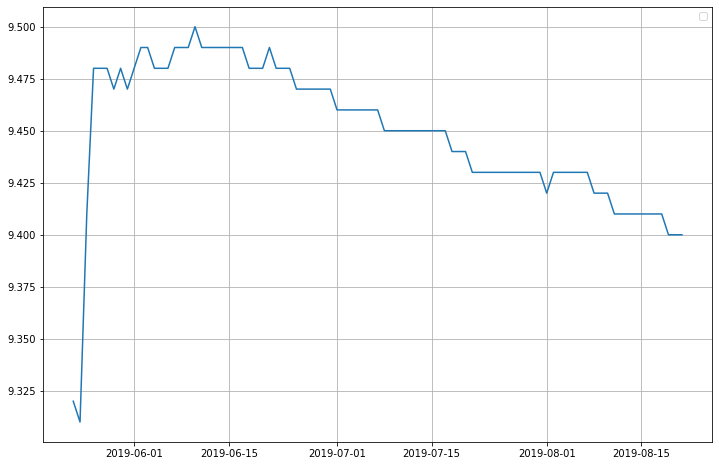

In [26]:
plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc = 'best')
plt.grid()
plt.show()

###  Graph above shows the change in movie rating by date (Movie 'Aladin') 

## Change in Movie rating by date (all recent movies) 

In [27]:
movie_pivot = pd.pivot_table(movie, index = ["date"], columns = ['name'], values =['point'])
movie_pivot.head()

point                                                              \
name       0.0MHz 1919 유관순 28일 후 500일의 썸머 가버나움 가장 따뜻한 색, 블루 건축학개론   걸캅스 고양이 춤   
date                                                                            
2019-05-14    NaN     8.54   NaN      NaN  9.6          NaN   NaN  5.65   NaN   
2019-05-15    NaN      NaN   NaN      NaN  9.6          NaN   NaN  5.64   NaN   
2019-05-16    NaN     8.54   NaN      NaN  9.6          NaN   NaN  5.64   NaN   
2019-05-17    NaN     8.54   NaN      NaN  9.6          NaN   NaN  5.65   NaN   
2019-05-18    NaN     8.54   NaN      NaN  9.6          NaN   NaN  5.63   NaN   

                     ...                                                     \
name       고양이를 부탁해  ... 패션 오브 크라이스트 패터슨 퍼펙트 월드 프란시스 하 플로리다 프로젝트 항거:유관순 이야기   
date                 ...                                                      
2019-05-14      NaN  ...         NaN NaN    NaN    NaN       NaN        NaN   
2019-05-15      NaN  ...         NaN NaN    NaN    NaN      8.59        NaN   
2019-05-16      NaN  ...         NaN NaN    NaN    NaN      8.59        NaN   
2019-05-17      NaN  ...         NaN NaN    NaN    NaN      8.59        NaN   
2019-05-18      NaN  ...         NaN NaN    NaN    NaN      8.59        NaN   

                                                  
name         헬보이 호랑이보다 무서운 겨울손님 호텔 뭄바이 황혼에서 새벽까지  
date                                              
2019-05-14  7.22            NaN   9.36       NaN  
2019-05-15  7.22           6.97   9.39       NaN  
2019-05-16  7.22           6.97   9.38       NaN  
2019-05-17  7.22           6.98   9.38       NaN  
2019-05-18  7.22           6.98   9.36       NaN  

[5 rows x 205 columns]

#### 위에 보이는것처럼 결과가 Jupyter NOtebook 에서는 판독하가 어려울수 있음 --> BUT 엑셀에서는 잘 보임

In [28]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [29]:
movie_pivot.head()

name,0.0MHz,1919 유관순,28일 후,500일의 썸머,가버나움,"가장 따뜻한 색, 블루",건축학개론,걸캅스,고양이 춤,고양이를 부탁해,...,패션 오브 크라이스트,패터슨,퍼펙트 월드,프란시스 하,플로리다 프로젝트,항거:유관순 이야기,헬보이,호랑이보다 무서운 겨울손님,호텔 뭄바이,황혼에서 새벽까지
date,,,,,,,,,,,,,,,,,,,,,
2019-05-14,NaN,8.54,NaN,NaN,9.6,NaN,NaN,5.65,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.22,NaN,9.36,NaN
2019-05-15,NaN,NaN,NaN,NaN,9.6,NaN,NaN,5.64,NaN,NaN,...,NaN,NaN,NaN,NaN,8.59,NaN,7.22,6.97,9.39,NaN
2019-05-16,NaN,8.54,NaN,NaN,9.6,NaN,NaN,5.64,NaN,NaN,...,NaN,NaN,NaN,NaN,8.59,NaN,7.22,6.97,9.38,NaN
2019-05-17,NaN,8.54,NaN,NaN,9.6,NaN,NaN,5.65,NaN,NaN,...,NaN,NaN,NaN,NaN,8.59,NaN,7.22,6.98,9.38,NaN
2019-05-18,NaN,8.54,NaN,NaN,9.6,NaN,NaN,5.63,NaN,NaN,...,NaN,NaN,NaN,NaN,8.59,NaN,7.22,6.98,9.36,NaN


### matplotlib (select Korean fonts)

In [31]:
import platform
from matplotlib import font_manager, rc

In [32]:
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system()== 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family=font_name)
else: print('Unknown system.... Sorry')

### Select specific movies & see the changes in ratings 

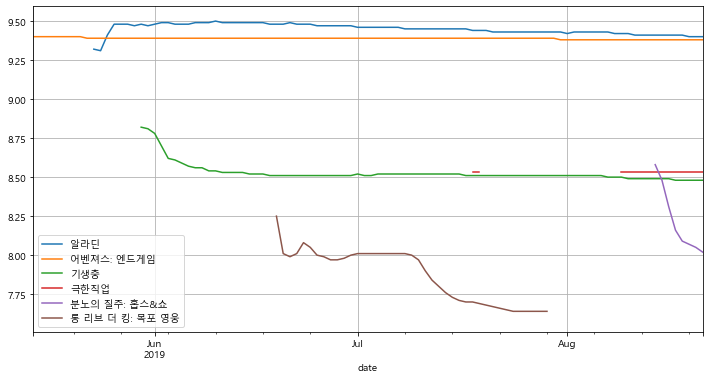

In [34]:
movie_pivot.plot(y = ['알라딘','어벤져스: 엔드게임','기생충','극한직업','분노의 질주: 홉스&쇼','롱 리브 더 킹: 목포 영웅'], figsize = (12,6))

plt.legend(loc='best')
plt.grid()
plt.show()